In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing all the required libraries

In [3]:
netflix = pd.read_csv("netflix.csv")

Importing the required datafile. We can do this using the upload option in Google Colab.


In [4]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


Having a glimpse at the dataset. This preview is raw which means we haven't made any changes or edited any columns in it.

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Understanding about different datatypes present in the dataset we see that there is only one integer data type which is release year.

In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
100*(netflix.isna().sum().loc[netflix.isna().sum()>0]/netflix.shape[0])

director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

This shows the percentage of the values which are missing in the given dataset. Almost 29% of the directors values are missing and 9% of the cast values are missing

In [8]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

From this we clearly understand that we have only 2 different types of netflix records (TVshow,Movie). And we also understand there are 17 different types of ratings.


[Text(0, 0, '6131'), Text(0, 0, '2676')]

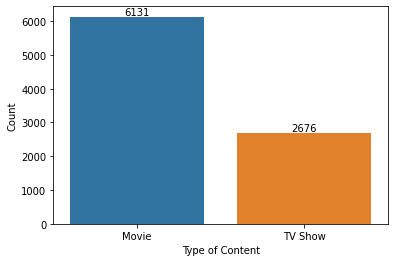

In [9]:
y = netflix["type"].value_counts()
x = y.index
z = sns.barplot(x=x,y=y)
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.bar_label(z.containers[0])

It's very clearly noted that we have more number of movies than TV shows. However we can further investigate on both of those contents to make better business decisions.

In [10]:
netflix_df1 = netflix.assign(listed_in = netflix["listed_in"].str.split(",")).explode("listed_in")

This steps makes the listed_in column a single value column but with records being increased. In simple we are doing the following here
1.We first split the column values
2.We explode it ( which means we add records i.e., new rows) and then
3.Assign them to the same column (in this case listed_in)

In [11]:
netflix_df1.reset_index(inplace=True)

In [12]:
netflix_df1.drop(labels=["index"],axis=1,inplace=True)

In [13]:
netflix_df1["listed_in"]=netflix_df1["listed_in"].str.strip()

We have reset the index to clearly understand the total new rows which are added after exploding the listed_in column. Now we can use this new data set for further analysis.Strip function removes any trailing and leading misleading spaces or characters.


In [14]:
netflix_df1["month_add"] = pd.to_datetime(netflix_df1["date_added"]).dt.month_name()
netflix_df1["day_add"] = pd.to_datetime(netflix_df1["date_added"]).dt.day_name()
netflix_df1["year_add"] = pd.to_datetime(netflix_df1["date_added"]).dt.year

This creates 3 new columns which are Month_add,Day_add,year_add these are columns which extracted month , day and year respectively from the date_added value of each row. The column which represents this is "date_added"


In [15]:
netflix_df1['cast']

0                                                      NaN
1        Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2        Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
3        Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
4        Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
                               ...                        
19318    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
19319    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
19320    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
19321    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
19322    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 19323, dtype: object

To make sure that we need the cast and country for our analysis to be ready. We must follow the same explode process and utilize them.

In [16]:
netflix_df1 = netflix_df1.assign(cast=netflix_df1['cast'].str.split(",")).explode('cast')
netflix_df1.reset_index(inplace=True)
netflix_df1.drop(labels=['index'],axis=1,inplace=True)
netflix_df1['cast']=netflix_df1['cast'].str.strip()

In [17]:
netflix_df1 = netflix_df1.assign(country=netflix_df1['country'].str.split(",")).explode('country')
netflix_df1.reset_index(inplace=True)
netflix_df1.drop(labels=['index'],axis=1,inplace=True)
netflix_df1['country']=netflix_df1['country'].str.strip()

In [18]:
netflix_df1 = netflix_df1.assign(director=netflix_df1['director'].str.split(",")).explode('director')
netflix_df1.reset_index(inplace=True)
netflix_df1.drop(labels=['index'],axis=1,inplace=True)
netflix_df1['director']=netflix_df1['director'].str.strip()

In [19]:
netflix_df1.shape

(202065, 15)

We see a lot of increament in the rows.Since we have exploded both the cast,director and country.

In [20]:
netflix_df1_copy = netflix_df1.copy()

In [21]:
netflix_df1_copy = netflix_df1_copy.groupby(["type","year_add"]).agg({"title":"nunique"})

We are doing using a groupby to summarize all the types of contents released over the years.

Text(0, 0.5, 'Number of Shows')

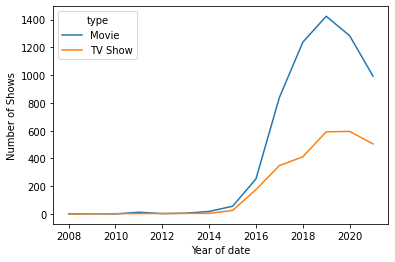

In [22]:
sns.lineplot(data=netflix_df1_copy,x="year_add",y="title",hue="type")
plt.xlabel('Year of date')
plt.ylabel('Number of Shows')

This clearly shows us that over all TV SHOWS have become much more after 2018. Similarly we see a leniar increase in the number of TV shows. However the increase in movies is more compared to that of TV shows

(2010.0, 2020.0)

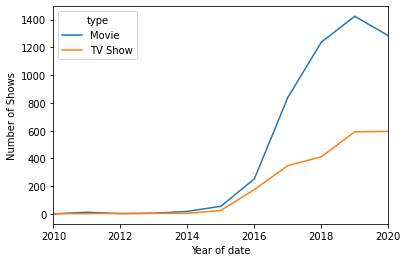

In [23]:
sns.lineplot(data=netflix_df1_copy,x="year_add",y="title",hue="type")
plt.xlabel('Year of date')
plt.ylabel('Number of Shows')
plt.xlim(2010,2020)

To understand the number of movies and TV shows released in the last 10 years.


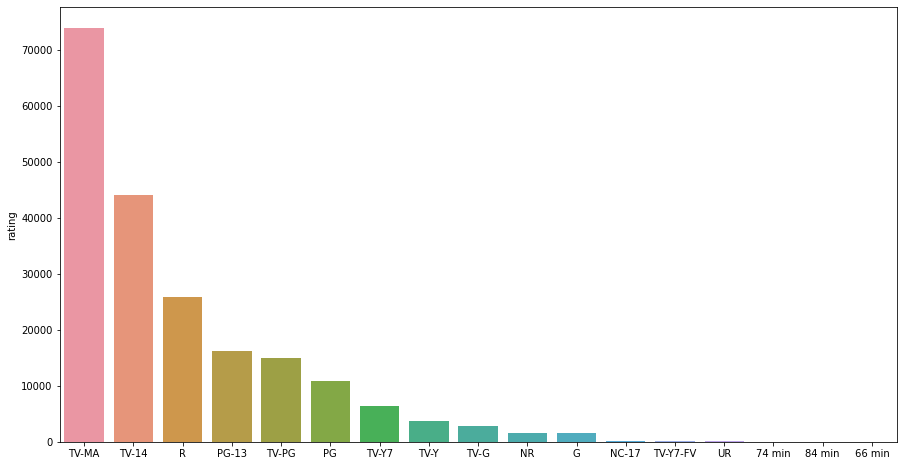

In [24]:
x2 = netflix_df1['rating'].value_counts()
x3 = x2.index
plt.figure(figsize=(15,8))
x4 = sns.barplot(data=netflix_df1,x=x3,y=x2)

This makes us to understand that we have the maximum ratings as TV-MA which means most of the content released on netflix is for Mature Audiance. Followed to that we have content which is unsuitable for children below 14 years of age. And then we have R rated content for which we need under 17 aged children parent or adult being accommpanied 

In [25]:
categories_copy = netflix_df1.copy()

In [26]:
categories_movies=categories_copy.loc[categories_copy['type']=='Movie']

In [27]:
categories_movies_1 = categories_movies.groupby("listed_in",as_index=False).agg({'title':'nunique'})

[Text(0.5, 0, 'Number of Movies'), Text(0, 0.5, 'Categories')]

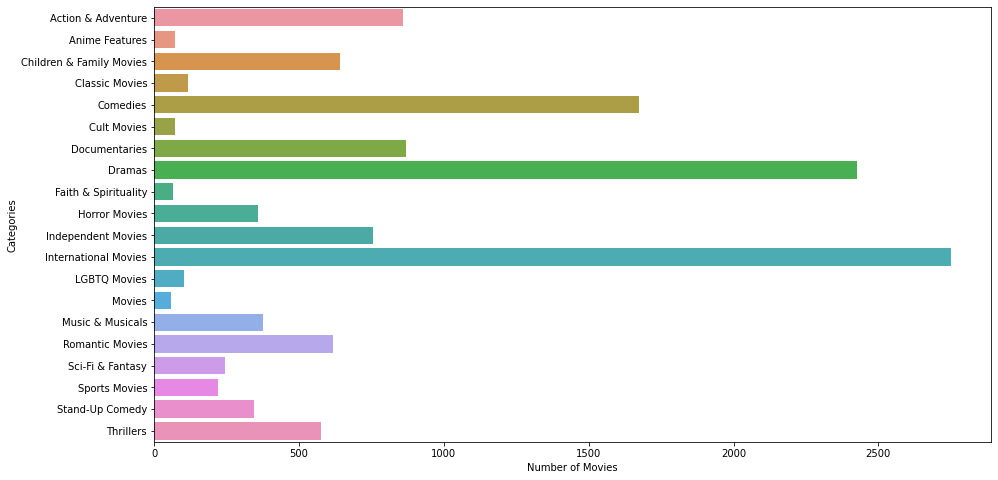

In [28]:
plt.figure(figsize=(15,8))
z1 = sns.barplot(data=categories_movies_1,x="title",y="listed_in")
z1.set(xlabel="Number of Movies",ylabel="Categories")

We see that most of the movies are released in international movies,followed by Dramas and Comedies

In [29]:
categories_tv = netflix_df1.copy()

In [30]:
categories_tv1 = categories_tv.loc[categories_tv['type']=='TV Show']
categories_tv2 = categories_tv1.groupby("listed_in",as_index=False).agg({'title':'nunique'})

[Text(0.5, 0, 'Number of Movies'), Text(0, 0.5, 'Categories')]

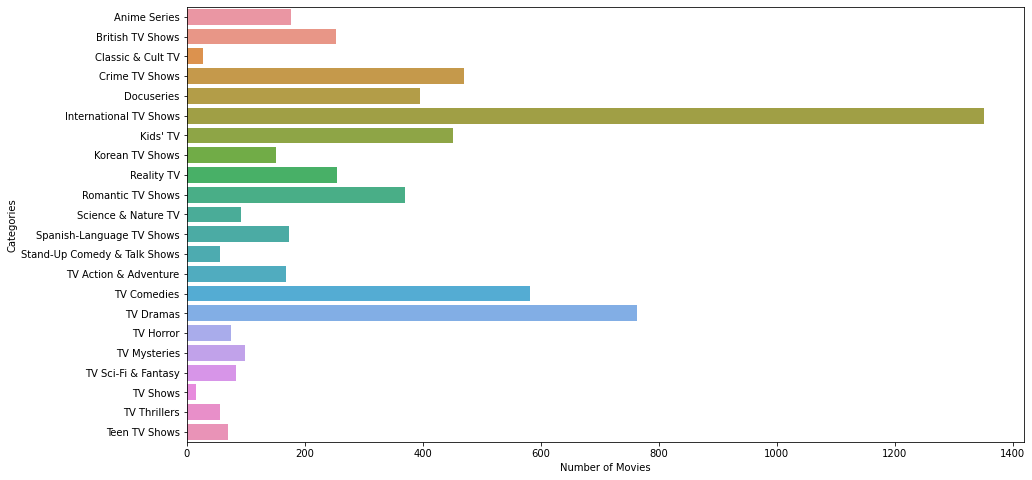

In [31]:
plt.figure(figsize=(15,8))
s1 = sns.barplot(data=categories_tv2,x="title",y="listed_in")
s1.set(xlabel="Number of Movies",ylabel="Categories")

We see that most of the movies are released in international TV movies,followed by TV Dramas and TV Comedies

<AxesSubplot: xlabel='year_add', ylabel='month_add'>

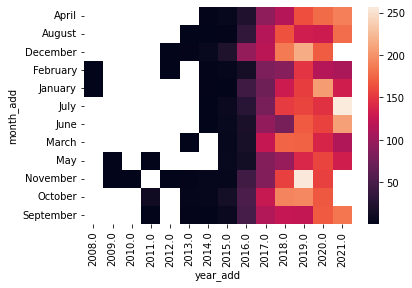

In [32]:
Goodtimes = netflix_df1.groupby(['month_add','year_add'],as_index=False).agg({'title':'nunique'})
Goodtimes2 = Goodtimes.pivot("month_add","year_add","title")
sns.heatmap(Goodtimes2)

By this heatmap we understand it too easily that from 2016 the number of movies & TV shows got bursted into netflix OTT platform. Approximately more than 50 items(TV shows/Movies) are released. Its also observed that maximum number fo movies were relased and may be "Good time" to release content is October , November & December.

In [33]:
indian_data = netflix_df1.loc[(netflix_df1['country']=="India")&(netflix_df1['type']=='Movie')&(netflix_df1['year_add'])]

Now, Let us try to find out the some statistics specifically to Country "India".

In [34]:
indian_directors = indian_data.groupby('director',as_index=False).agg({'title':'nunique'})
indian_directors1 = indian_directors.loc[indian_directors['title']>2]

[Text(0, 0, 'Abbas Alibhai Burmawalla'),
 Text(1, 0, 'Abhinay Deo'),
 Text(2, 0, 'Abhishek Chaubey'),
 Text(3, 0, 'Abhishek Kapoor'),
 Text(4, 0, 'Abhishek Sharma'),
 Text(5, 0, 'Amitoj Mann'),
 Text(6, 0, 'Anees Bazmee'),
 Text(7, 0, 'Anurag Basu'),
 Text(8, 0, 'Anurag Kashyap'),
 Text(9, 0, 'Ashutosh Gowariker'),
 Text(10, 0, 'Aziz Mirza'),
 Text(11, 0, 'Chandrakant Kulkarni'),
 Text(12, 0, 'David Dhawan'),
 Text(13, 0, 'Dibakar Banerjee'),
 Text(14, 0, 'Farah Khan'),
 Text(15, 0, 'Farhan Akhtar'),
 Text(16, 0, 'Gajendra Ahire'),
 Text(17, 0, 'Hardik Mehta'),
 Text(18, 0, 'Hrishikesh Mukherjee'),
 Text(19, 0, 'Imtiaz Ali'),
 Text(20, 0, 'Indra Kumar'),
 Text(21, 0, 'Karan Johar'),
 Text(22, 0, 'Ken Ghosh'),
 Text(23, 0, 'Ketan Mehta'),
 Text(24, 0, 'Kundan Shah'),
 Text(25, 0, 'Latif Faiziyev'),
 Text(26, 0, 'Leena Yadav'),
 Text(27, 0, 'Lekh Tandon'),
 Text(28, 0, 'Madhur Bhandarkar'),
 Text(29, 0, 'Mahesh Bhatt'),
 Text(30, 0, 'Mahesh Manjrekar'),
 Text(31, 0, 'Mani Ratnam'),
 Text

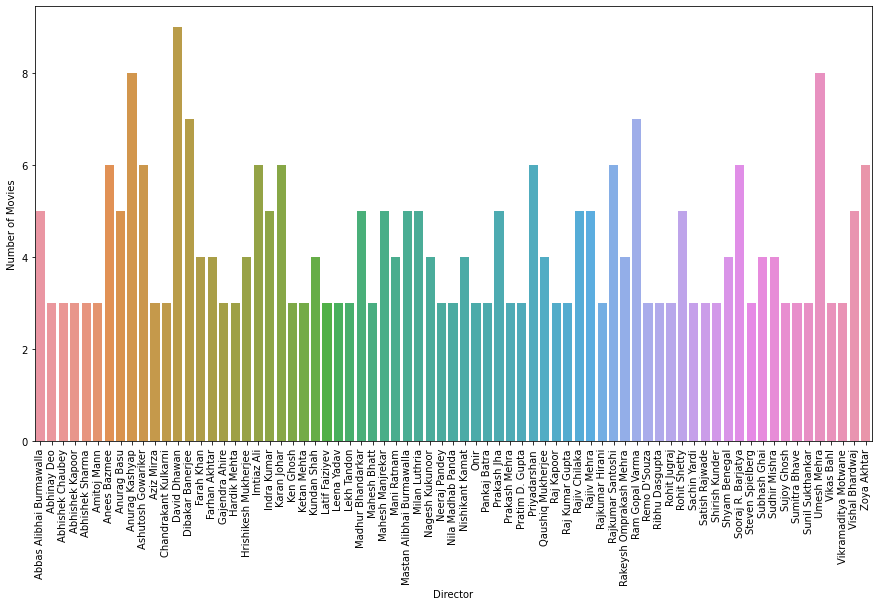

In [35]:
plt.figure(figsize=(15,8))
ia=sns.barplot(data=indian_directors1,x='director',y='title')
ia.set(xlabel="Director",ylabel="Number of Movies")
ia.set_xticklabels(ia.get_xticklabels(),rotation=90)

From this we are trying to understand the potential of Indian directors on netflix.With a minimum of more than 2 films we have 72 Indian directors. Among them David Dhawan has made the highest number of Movies from india and launched on Netflix.

In [36]:
indian_data2 = netflix_df1.loc[(netflix_df1['country']=="India")&(netflix_df1['type']=='TV Show')&(netflix_df1['year_add'])]

[Text(0, 0, 'Anurag Kashyap'),
 Text(1, 0, 'Arvind Swamy'),
 Text(2, 0, 'B. V. Nandini Reddy'),
 Text(3, 0, 'Bejoy Nambiar'),
 Text(4, 0, 'Bumpy'),
 Text(5, 0, 'Caroline Sá'),
 Text(6, 0, 'Chico Pereira'),
 Text(7, 0, 'Deepti Kakkar'),
 Text(8, 0, 'Dheeraj Berry'),
 Text(9, 0, 'Elaine McMillion Sheldon'),
 Text(10, 0, 'Fahad Mustafa'),
 Text(11, 0, 'Gautham Vasudev Menon'),
 Text(12, 0, 'Hikaru Toda'),
 Text(13, 0, 'Karthik Narain'),
 Text(14, 0, 'Karthik Subbaraj'),
 Text(15, 0, 'Moyoung Jin'),
 Text(16, 0, 'Nag Ashwin'),
 Text(17, 0, 'Nizar Shafi'),
 Text(18, 0, 'Patrick Graham'),
 Text(19, 0, 'Priyadarshan'),
 Text(20, 0, 'Rathindran R Prasad'),
 Text(21, 0, 'Sankalp Reddy'),
 Text(22, 0, 'Sarjun'),
 Text(23, 0, 'Soumendra Padhi'),
 Text(24, 0, 'Sudha Kongara'),
 Text(25, 0, 'Tharun Bhascker Dhaassyam'),
 Text(26, 0, 'Vasanth Sai'),
 Text(27, 0, 'Vetri Maaran'),
 Text(28, 0, 'Vignesh Shivan'),
 Text(29, 0, 'Vijay Roche'),
 Text(30, 0, 'Vikramaditya Motwane')]

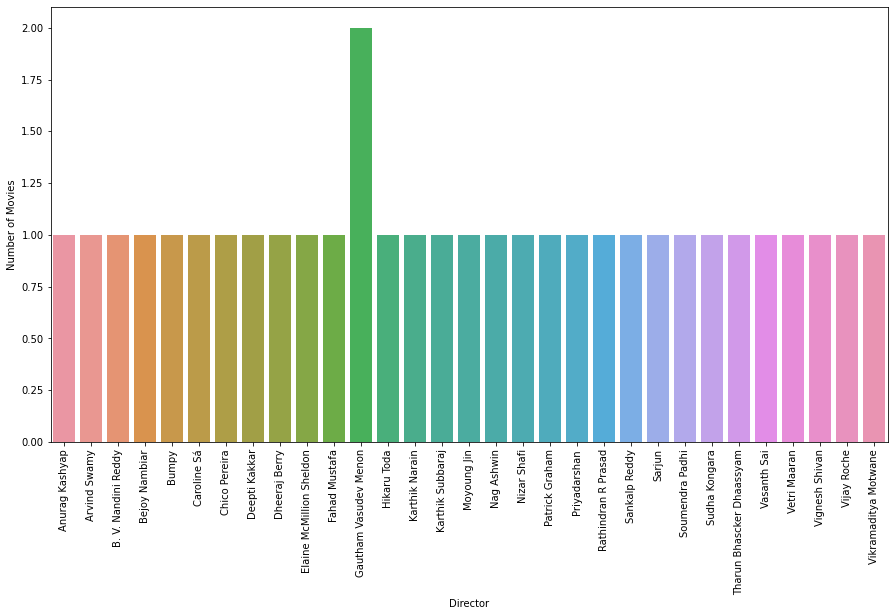

In [37]:
indian_directors3 = indian_data2.groupby('director',as_index=False).agg({'title':'nunique'})
plt.figure(figsize=(15,8))
ia=sns.barplot(data=indian_directors3,x='director',y='title')
ia.set(xlabel="Director",ylabel="Number of Movies")
ia.set_xticklabels(ia.get_xticklabels(),rotation=90)

With this we understand that Gautham Vasudev Menon has topped the number of TV shows in India.

In [38]:
indian_actors = netflix_df1.loc[(netflix_df1['type']=='Movie')& (netflix_df1['country']=='India')]

In [39]:
indian_actors2 = indian_actors.groupby('cast',as_index=False).agg({'title':'nunique'})
indian_actors3 = indian_actors2.loc[indian_actors2['title']>10]

[Text(0, 0, 'Aamir Khan'),
 Text(1, 0, 'Abhay Deol'),
 Text(2, 0, 'Abhishek Bachchan'),
 Text(3, 0, 'Adil Hussain'),
 Text(4, 0, 'Ajay Devgn'),
 Text(5, 0, 'Akshay Kumar'),
 Text(6, 0, 'Alok Nath'),
 Text(7, 0, 'Amitabh Bachchan'),
 Text(8, 0, 'Amrish Puri'),
 Text(9, 0, 'Anil Kapoor'),
 Text(10, 0, 'Anupam Kher'),
 Text(11, 0, 'Arjun Rampal'),
 Text(12, 0, 'Asrani'),
 Text(13, 0, 'Boman Irani'),
 Text(14, 0, 'Dalip Tahil'),
 Text(15, 0, 'Divya Dutta'),
 Text(16, 0, 'Gulshan Grover'),
 Text(17, 0, 'Irrfan Khan'),
 Text(18, 0, 'Jackie Shroff'),
 Text(19, 0, 'Jimmy Shergill'),
 Text(20, 0, 'John Abraham'),
 Text(21, 0, 'Johny Lever'),
 Text(22, 0, 'Juhi Chawla'),
 Text(23, 0, 'Kareena Kapoor'),
 Text(24, 0, 'Katrina Kaif'),
 Text(25, 0, 'Kay Kay Menon'),
 Text(26, 0, 'Konkona Sen Sharma'),
 Text(27, 0, 'Kulbhushan Kharbanda'),
 Text(28, 0, 'Mahesh Manjrekar'),
 Text(29, 0, 'Manisha Koirala'),
 Text(30, 0, 'Manoj Bajpayee'),
 Text(31, 0, 'Manoj Joshi'),
 Text(32, 0, 'Mithun Chakraborty'),

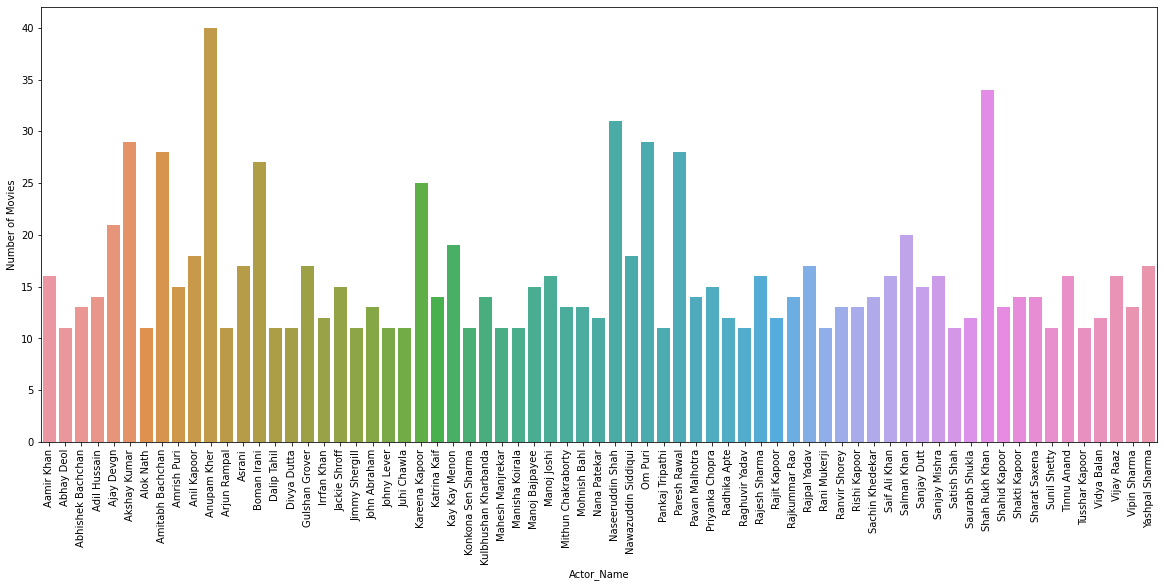

In [40]:
plt.figure(figsize=(20,8))
ia4 = sns.barplot(data=indian_actors3,x="cast",y="title")
ia4.set(xlabel="Actor_Name",ylabel="Number of Movies")
ia4.set_xticklabels(ia4.get_xticklabels(),rotation=90)

From this we understand that Anupam Kher and Shah Rukh Khan are the top actors among movies type content in the country India

In [45]:
countries = netflix_df1.groupby('country',as_index=False).agg({'title':'nunique'})

In [46]:
countries2 = countries.loc[countries['title']>10]

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Number of Movies/TVShows')]

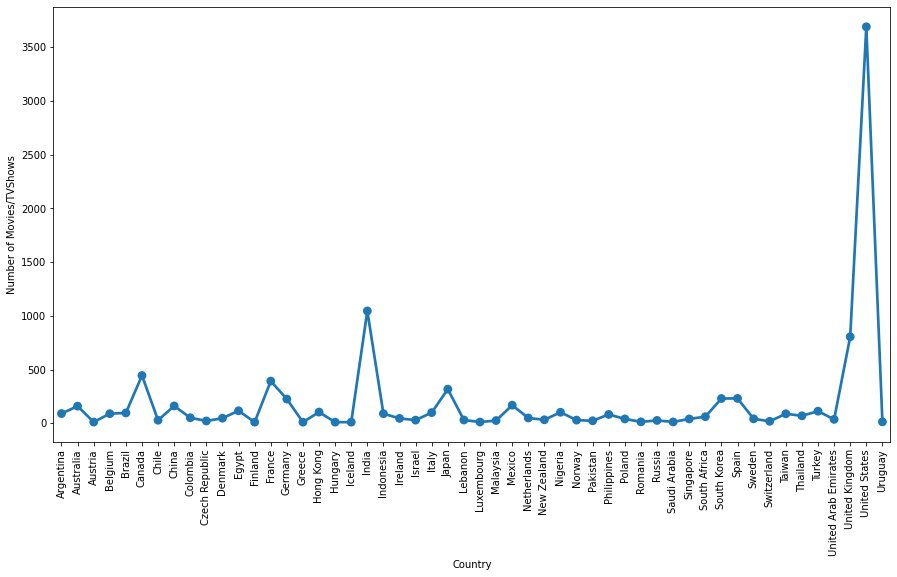

In [48]:
plt.figure(figsize=(15,8))
c1 = sns.pointplot(data=countries2,x='country',y='title')
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
c1.set(xlabel="Country",ylabel="Number of Movies/TVShows")

USA has the highest content released on Netflix since its launch. Followed by other countries like India, United Kingdom.